In [1]:
import math
from collections import defaultdict
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt

from nnperm_utils import error_barrier_linspace_sample, error_barrier_from_losses


def load_values(save_dir: Path):
    values = defaultdict(list)
    for f in save_dir.glob("*"):
        outputs = torch.load(f, map_location=torch.device("cpu"))
        _, i, j = f.stem.split("_")
        values[f"rep_{i}"].append(int(i))
        values[f"rep_{j}"].append(int(j))
        for k, v in outputs.items():
            if k.endswith("_barriers"):
                values[k[:-len("_barriers")]].append(np.mean(v, axis=1))
                values[k].append(error_barrier_from_losses(v, reduction='mean'))
            else:
                values[k].append(v)
    return values

def plot_mean_std(title, y, y_max):
    mean = np.mean(y, axis=0)
    std = np.std(y, axis=0)
    midpoint = len(mean) // 2
    x = error_barrier_linspace_sample(len(mean))
    plt.fill_between(x, mean - std, mean + std, alpha=0.3, color="grey")
    colors = plt.cm.viridis(np.linspace(0, 1, len(mean)))
    for line, color in zip(y, colors):
        plt.plot(x, line, c=color, alpha=0.7, linewidth=1)
    plt.plot(x, mean, color="grey", linestyle="dotted", linewidth=2)
    plt.title(f"{title} {mean[midpoint]:0.3f} {std[midpoint]:0.3f}")
    plt.xlabel("Interpolation alpha")
    plt.ylim([-0.7, y_max])
    plt.ylabel("Error barrier (cross entropy)")

def plot_error_barriers(barriers: dict, y_max: float):
    plt.figure(figsize=(4 * len(barriers), 4))
    for i, (k, v) in enumerate(barriers.items()):
        plt.subplot(1, len(barriers) + 1, i + 1)
        plot_mean_std(k, np.stack(v, axis=0), y_max)
    plt.show()

def plot_from_dir(save_dir):
    values = load_values(Path(save_dir))
    if len(values) == 0:
        print(f"Failed to load {save_dir}")
        return
    print(save_dir)
    barriers = {k: v for k, v in values.items() if k.endswith("_barriers")}
    if "574" in str(d):
        plot_error_barriers(barriers, 1.4)
    else:
        plot_error_barriers(barriers, 7.)

outputs/exp_1/5_11_10000_L1_train_574e51abc295d8da78175b320504f2ba


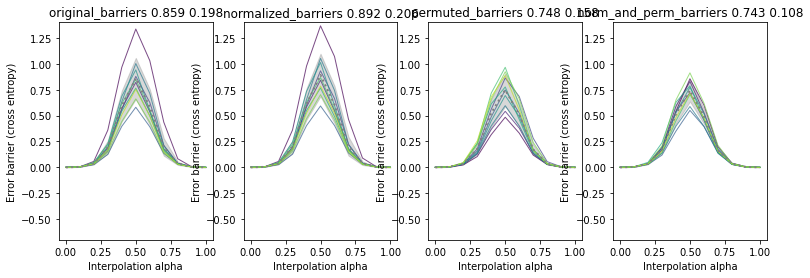

outputs/exp_1/5_11_10000_L1_train_9d0811cc67a44e1ec85e702a5e01570f


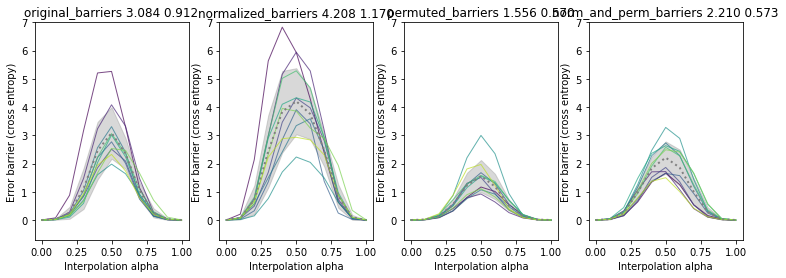

outputs/exp_1/5_11_10000_L2_train_574e51abc295d8da78175b320504f2ba


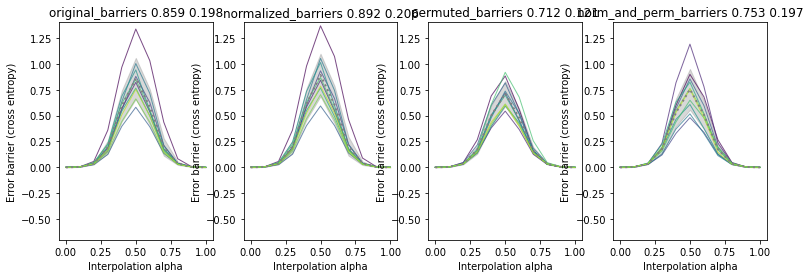

outputs/exp_1/5_11_10000_L2_train_9d0811cc67a44e1ec85e702a5e01570f


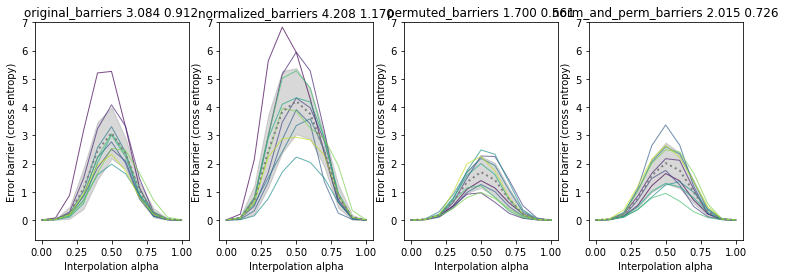

outputs/exp_1/5_False_L1Loss()_train_71bc92a970b64a76d7ab7681764b0021


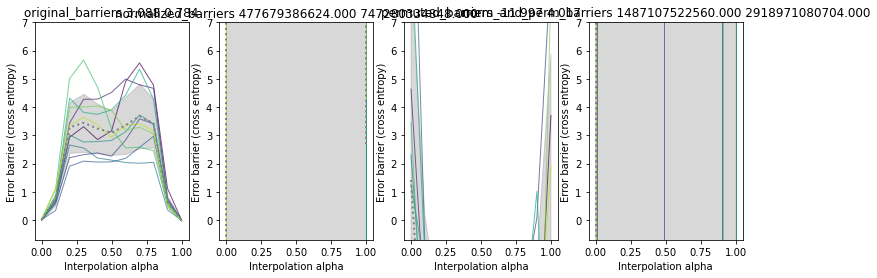

outputs/exp_1/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52


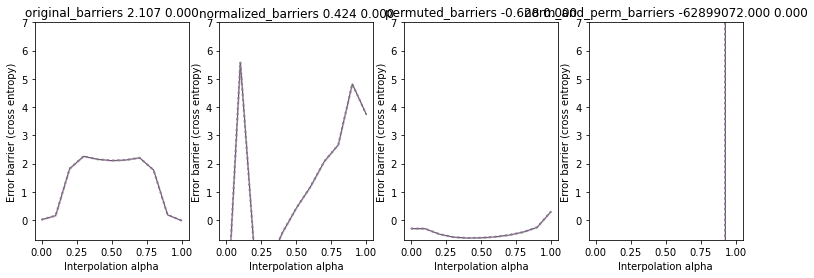

outputs/exp_1/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


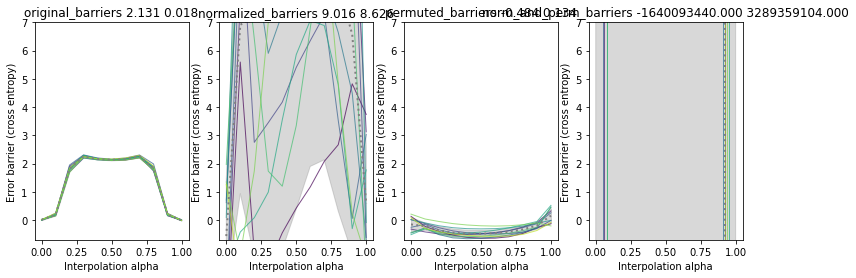

In [2]:
# plot exp 1: change in error barriers after aligning pairs of checkpoints

# dirs = [
#     ("outputs/train_574e51abc295d8da78175b320504f2ba_5_10_10000", 1),
#     ("outputs/train_9d0811cc67a44e1ec85e702a5e01570f_5_10_10000", 5),
# ]
# for d, ymax in dirs:
#     plot_from_dir(d, ymax)

for d in Path("outputs/exp_1").glob("*"):
    plot_from_dir(d)

Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.0_train_7312e802e619673d23c7a02eba8aee52
outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_574e51abc295d8da78175b320504f2ba


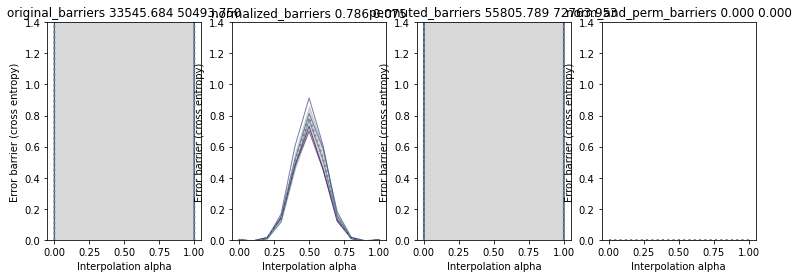

Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_-1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba


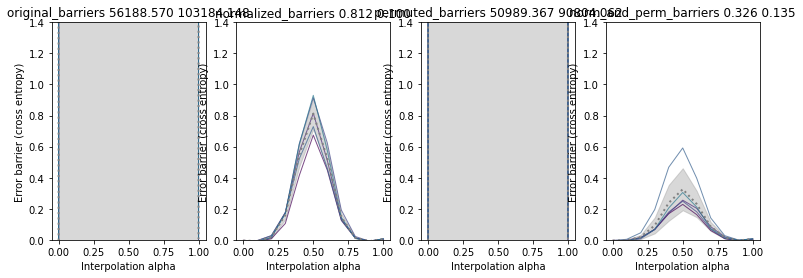

Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.1_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.1_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_-1_True_True_0.5_train_574e51abc295d8da78175b320504f2ba


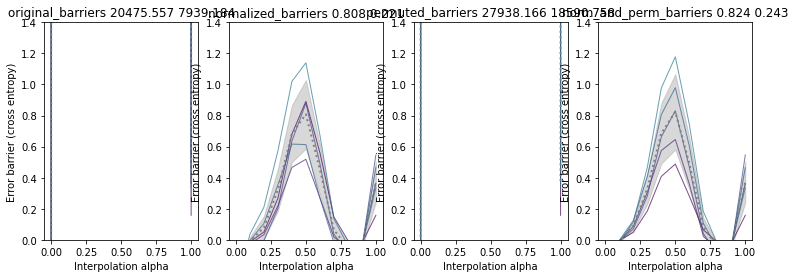

Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.5_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.5_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_1_True_True_0.0_train_574e51abc295d8da78175b320504f2ba


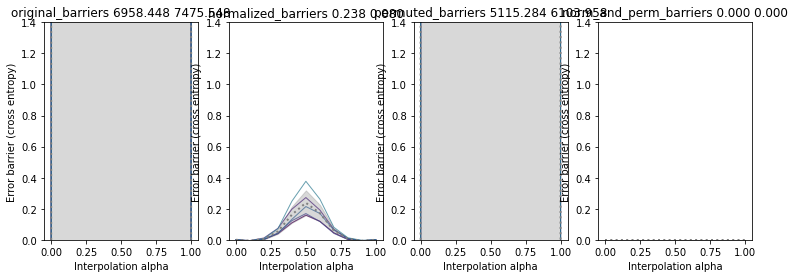

Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.0_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba


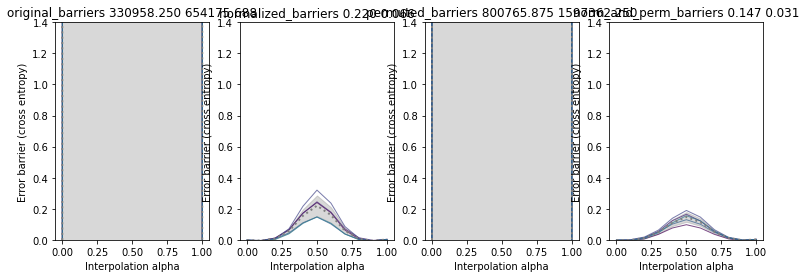

Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.1_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.1_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_1_True_True_0.5_train_574e51abc295d8da78175b320504f2ba


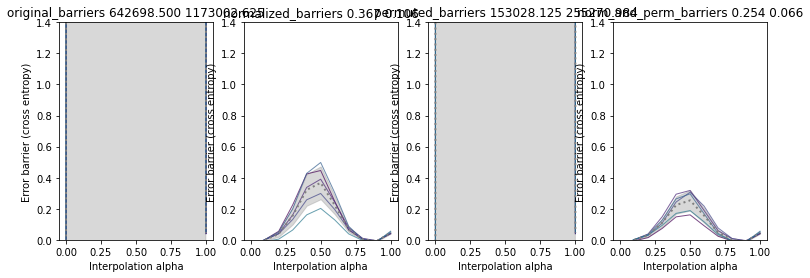

Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.5_train_7312e802e619673d23c7a02eba8aee52
outputs/exp_2/5_False_MSELoss()_-1_True_True_0.0_train_574e51abc295d8da78175b320504f2ba


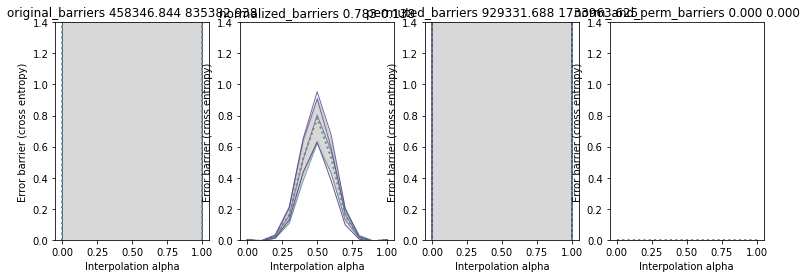

Failed to load outputs/exp_2/5_False_MSELoss()_-1_True_True_0.0_train_7312e802e619673d23c7a02eba8aee52
outputs/exp_2/5_False_MSELoss()_-1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba


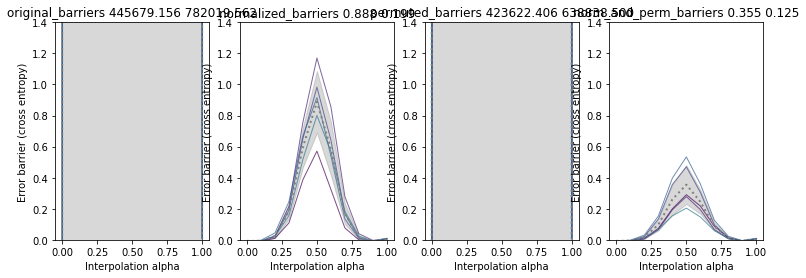

outputs/exp_2/5_False_MSELoss()_-1_True_True_0.5_train_574e51abc295d8da78175b320504f2ba


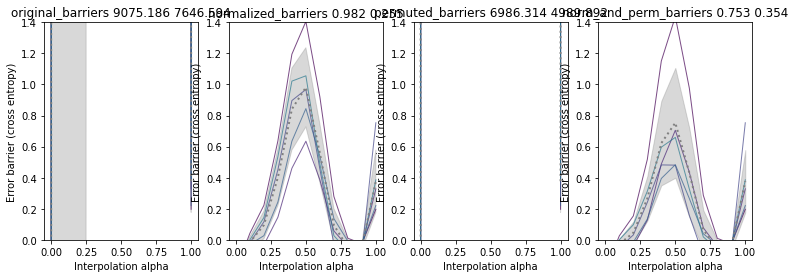

outputs/exp_2/5_False_MSELoss()_1_False_True_0.1_train_574e51abc295d8da78175b320504f2ba


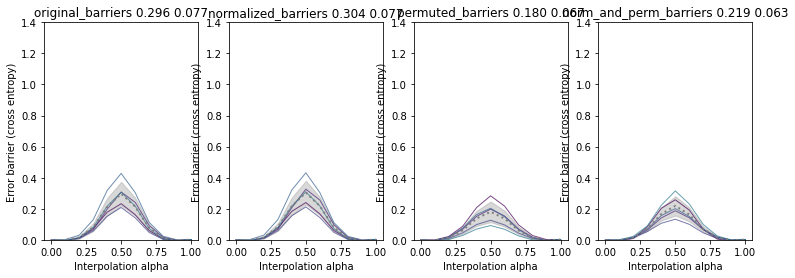

Failed to load outputs/exp_2/5_False_MSELoss()_1_False_True_0.1_train_7312e802e619673d23c7a02eba8aee52
outputs/exp_2/5_False_MSELoss()_1_False_True_0.1_train_9d0811cc67a44e1ec85e702a5e01570f


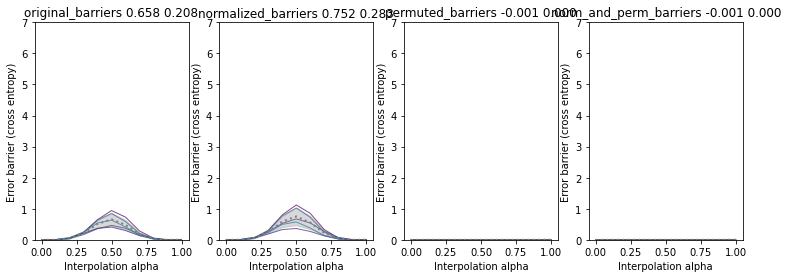

outputs/exp_2/5_False_MSELoss()_1_True_True_0.0_train_574e51abc295d8da78175b320504f2ba


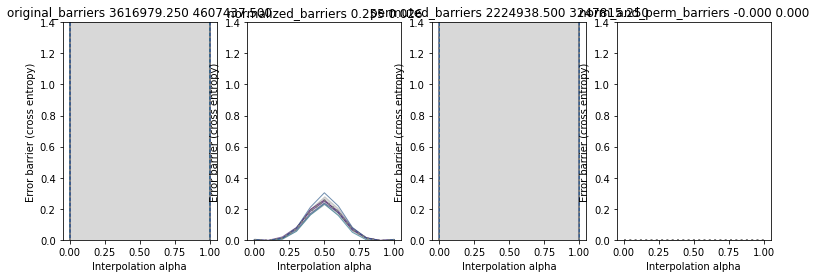

outputs/exp_2/5_False_MSELoss()_1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba


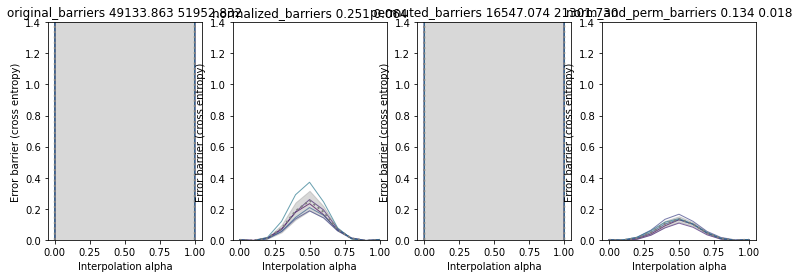

outputs/exp_2/5_False_MSELoss()_1_True_True_0.5_train_574e51abc295d8da78175b320504f2ba


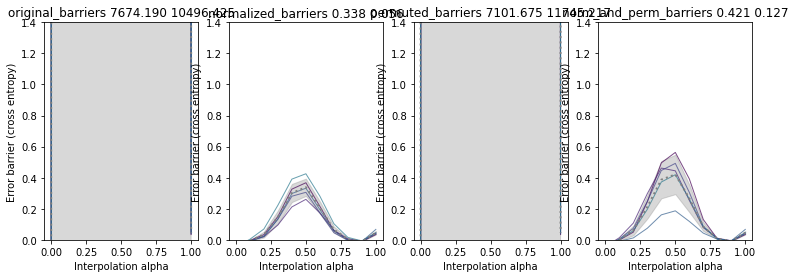

In [38]:
# plot exp 2: error barriers due to known permutation

# "exp_2/5_False_L1Loss()_-1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba"

for d in Path("outputs/exp_2").glob("*"):
    plot_from_dir(d)

In [3]:
# plot loss for geometric realignment

def plot_loss_over_search(save_dir, max_cols=3):
    values = load_values(Path(d))
    if len(values) == 0:
        print(f"Failed to load {save_dir}")
        return
    print(d)
    losses = {k: v for k, v in values.items() if "loss" in k}
    for k, v in losses.items():
        v = list(zip(*v))
        layers = [np.stack(x, axis=0) for x in v]
        print(k, len(layers), [x.shape for x in layers])
        plt.figure(figsize=(4 * len(layers[0]), 4 * len(layers[:-1])))
        for i, layer in enumerate(layers[:-1]):
            for j, rep in enumerate(layer[:max_cols]):
                plt.subplot(len(layers[:-1]) + 1, len(layer), i * len(layer) + j + 1)
                x = np.arange(len(rep))
                plt.scatter(x, rep, marker=".", s=0.5, alpha=0.2 / math.log(len(rep)), color="black")
                plt.plot(x, np.minimum.accumulate(rep))
        plt.show()

outputs/exp_1/5_11_10000_L1_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


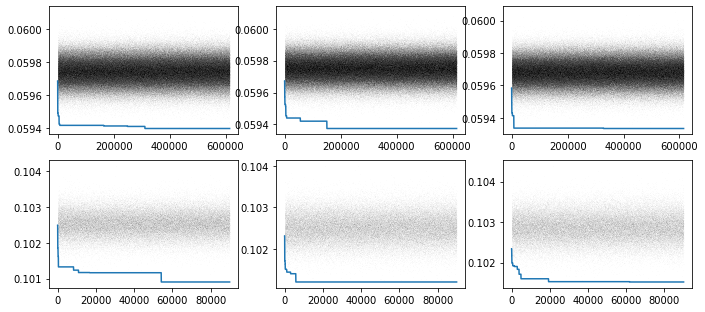

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


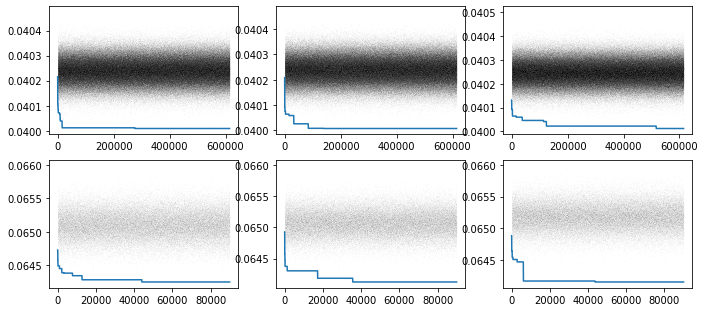

outputs/exp_1/5_11_10000_L1_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


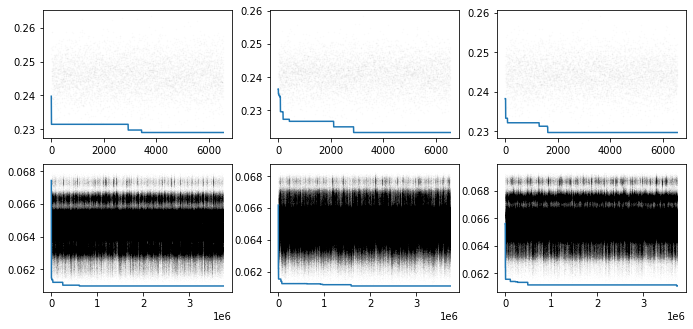

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


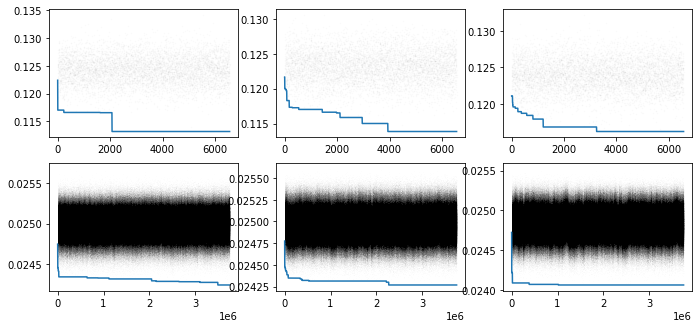

outputs/exp_1/5_11_10000_L2_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


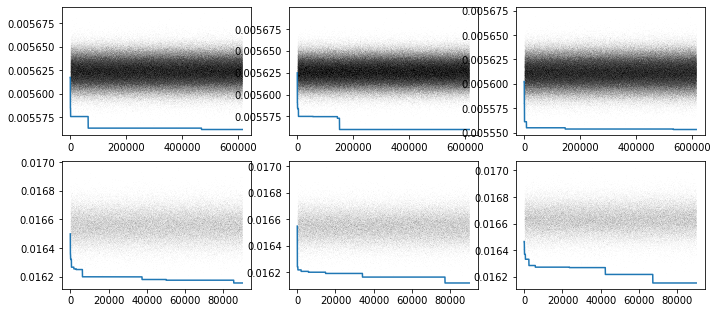

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


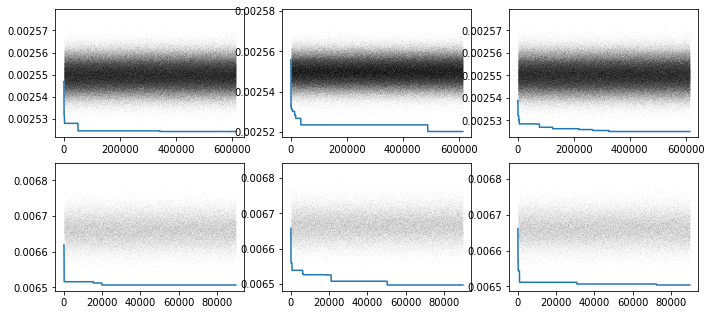

outputs/exp_1/5_11_10000_L2_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


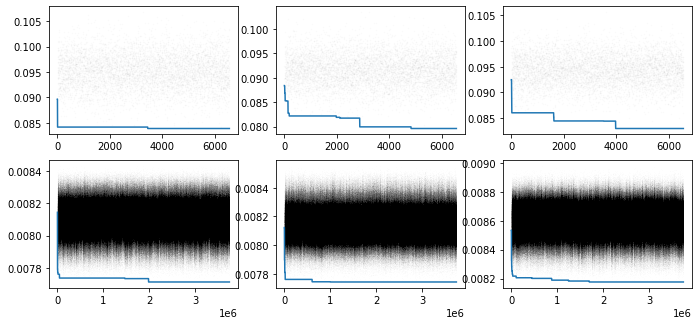

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


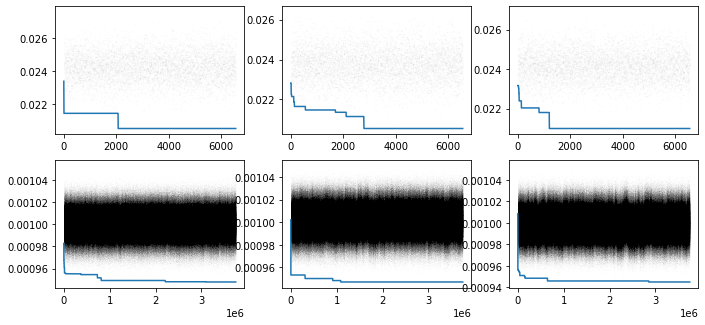

Failed to load outputs/exp_1/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_1/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


In [6]:
for d in Path("outputs/exp_1").glob("*"):
    plot_loss_over_search(d)

outputs/exp_1/5_11_10000_L1_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


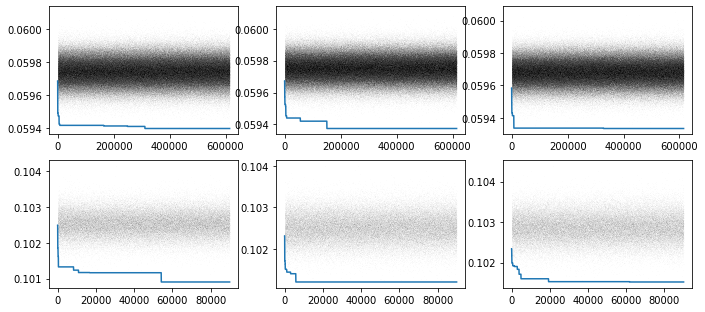

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


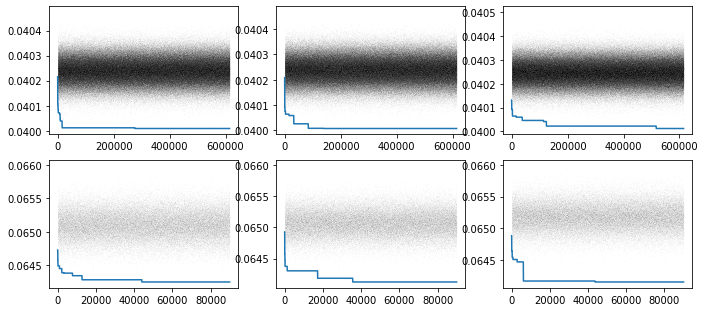

outputs/exp_1/5_11_10000_L1_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


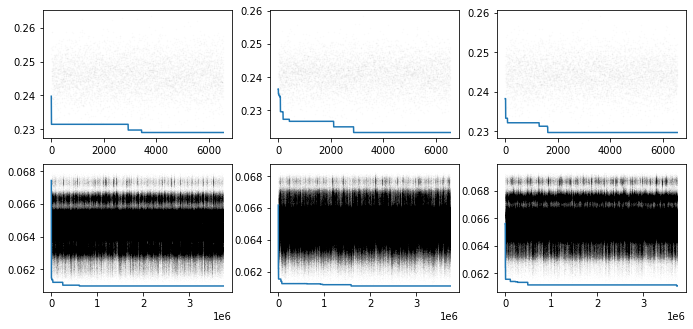

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


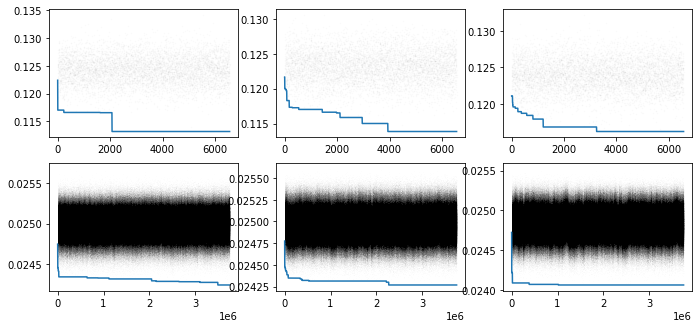

outputs/exp_1/5_11_10000_L2_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


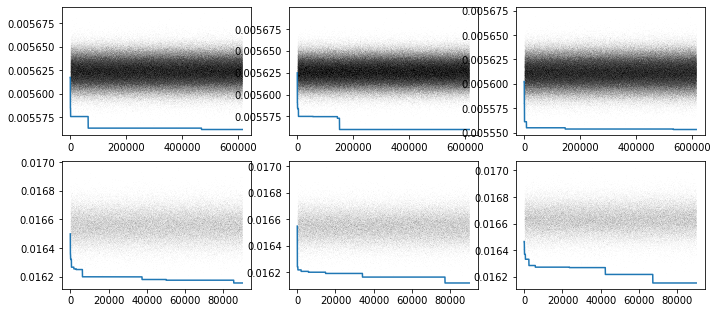

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


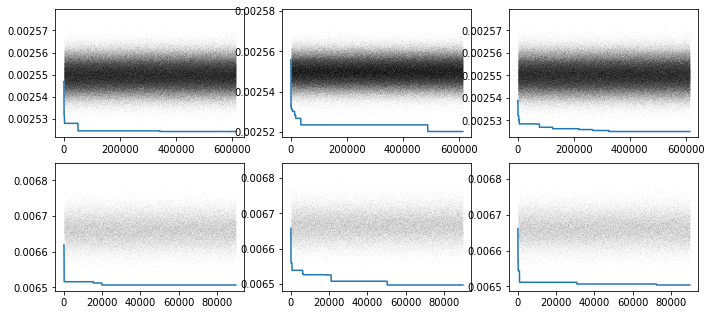

outputs/exp_1/5_11_10000_L2_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


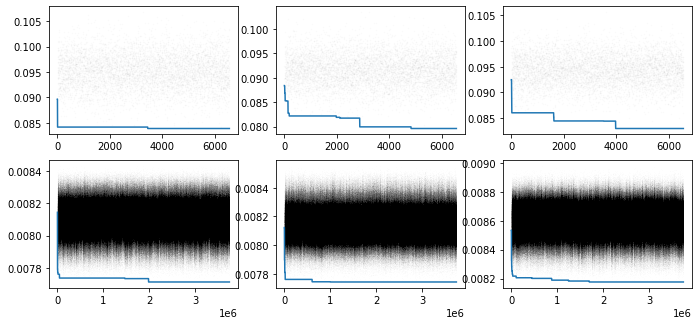

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


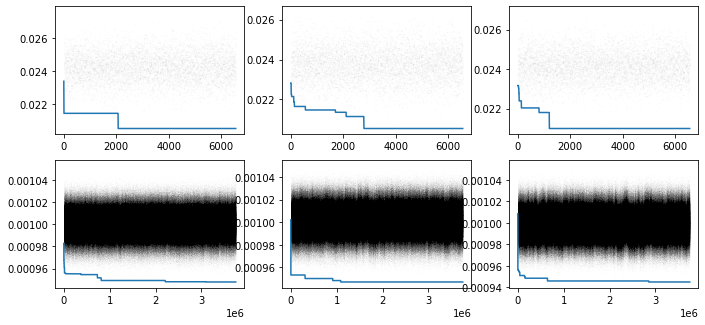

Failed to load outputs/exp_1/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_1/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


In [4]:
# plot loss for geometric realignment
for d in Path("outputs/exp_1").glob("*"):
    plot_loss_over_search(d)

In [ ]:
# baseline error between non-aligned layers
#TODO